<a href="https://colab.research.google.com/github/olgamcunha/INFORM/blob/main/Breast_cancer_SQL_Olga_Mariana_Cunha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install duckdb streamlit matplotlib plotly seaborn pandas numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


**Understanding Breast Cancer Patterns from a dataset**

Breast cancer is one of the most common cancers among women worldwide, representing a significant public health challenge. It originates from the epithelial cells of the breast tissue and can vary in its aggressiveness and prognosis. Early detection through screening programs and advances in diagnostic tools have improved outcomes, but breast cancer remains a leading cause of cancer-related mortality.

Key factors influencing breast cancer risk include age, genetic predisposition, hormonal status, and lifestyle factors. Clinically, the disease is categorized based on tumor size, lymph node involvement, and metastatic spread, which determine the stage and inform treatment decisions. Understanding the underlying patterns and correlations in clinical data is crucial for advancing research, improving patient outcomes, and tailoring therapies to individual needs.

This project aims to analyze a breast cancer dataset obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia and which is available at UC Irvine Nachine Learning Repository.



The following table represents the processed and structured data derived from the breast cancer raw dataset.

Each row corresponds to a patient record, with features describing the patient's demographics, tumor characteristics, such as tumor size, involved lymph nodes, degree of malignancy and location.

In [3]:
import duckdb
import plotly.express as px
import seaborn as sns
conn = duckdb.connect()
query = """
CREATE TABLE BreastCancer AS
SELECT
    column0 AS Class,
    column1 AS age,
    column2 AS menopause,
    column3 AS tumor_size,
    column4 AS inv_nodes,
    column5 AS node_caps,
    column6 AS deg_maling,
    column7 AS breast,
    column8 AS breast_quad,
    column9 AS irradiant
FROM read_csv_auto('/content/breast-cancer.data');
"""
conn.execute(query)
query = """
select *
from BreastCancer
"""
df = conn.sql(query).df()
df

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_maling,breast,breast_quad,irradiant
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,False
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,False
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,False
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,False
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,False
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,False
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,True
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,False
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,False


The graphs presented below aim to provide insights into clinically relevant variables within the breast cancer dataset. This analysis highlights the relationships between tumor characteristics, patient demographics, and disease classification (benign vs. malignant). By examining these patterns, we can better understand key factors associated with breast cancer progression and prognosis.

In [40]:
#class distribution

import plotly.express as px

# Create the class distribution chart with colorblind-friendly colors
fig = px.histogram(
    df,
    x='Class',
    color='Class',
    title='Class Distribution',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe  # Colorblind-friendly palette
)

# Update layout to add title, labels, and include a caption (legend removed)
fig.update_layout(
    title_text='Class Distribution',
    title_x=0.5,  # Center the title
    xaxis_title='Class',
    yaxis_title='Count',
    showlegend=False,  # Remove the legend
    annotations=[
        dict(
            text="Figure 1: Distribution of cases between no-recurrence events and recurrence events.",
            x=0.5,
            y=-0.2,  # Position the caption
            xref="paper",
            yref="paper",
            showarrow=False,
            font=dict(size=12)
        )
    ]
)

# Display the chart
fig.show()


The bar chart illustrates the distribution of breast cancer cases based on recurrence status. A total of 201 cases are classified as having no recurrence events, while 85 cases are classified as having recurrence events.

This distribution highlights that the majority of patients, approximately 70%, did not experience recurrence, whereas around 30% of cases involved recurrence events.

In [43]:
# Age distribution

import plotly.express as px

# Create an age distribution plot
fig = px.histogram(
    df,
    x='age',
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'age': ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']}  # Correct age order
)

# Update layout for title, labels, and caption
fig.update_layout(
    title={
        'text': 'Age Distribution',
        'x': 0.5,  # Center the title
        'xanchor': 'center'
    },
    xaxis_title='Age Group',
    yaxis_title='Count',
    showlegend=False,  # No legend needed for a single variable
    margin={'t': 50, 'b': 100}  # Adjust margins for caption space
)

# Add a caption below the plot
fig.add_annotation(
    text="Figure 2: Age distribution of breast cancer cases across different age groups.",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Position below the chart
    showarrow=False,
    font=dict(size=12)
)

# Display the chart
fig.show()


The bar chart displays the age distribution of breast cancer cases, grouped into six age ranges. The highest frequencies are observed in the 50–59 age group, with 96 cases, followed by the 40–49 age group with 90 cases. The 60–69 age group has 57 cases, while the younger age groups, 30–39 and 20–29, have significantly fewer cases, with 36 and 1 case respectively. The oldest age group, 70–79, has only 6 cases.

This distribution suggests that breast cancer is most prevalent among individuals aged 40–59, with a gradual decline in frequency as age increases beyond 60. The lower case count in younger and older age groups may reflect differences in screening practices, biological risk factors, or population size in these age brackets. These findings emphasize the critical importance of targeted screening and awareness campaigns, to ensure early detection and intervention.

In [46]:
# Class vs Age

# Define the correct order for the age groups
age_order = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create the Class vs. Age plot with ordered age groups
fig = px.histogram(
    df,
    x='age',
    color='Class',
    title='Age Group Distribution by Recurrence Status',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'age': age_order}  # Explicitly set the order of age groups
)

# Update layout to add title, labels, and customize appearance
fig.update_layout(
    title_text='Age Group Distribution by Recurrence Status',
    title_x=0.5,  # Center the title
    xaxis_title='Age Group',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='v',  # Vertical legend
        x=1,              # Position on the right side of the chart
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin={'t': 50, 'b': 100}  # Adjust margins for caption space
)

# Add a caption below the plot
fig.add_annotation(
    text="Figure 3: Distribution of no-recurrence and recurrence events across age groups.",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Position below the chart
    showarrow=False,
    font=dict(size=12)
)

# Display the chart
fig.show()




The bar chart shows the distribution of breast cancer cases categorized as no-recurrence events and recurrence events across six age groups. The data reveals that for most age groups, the no-recurrence cases outnumber the recurrence cases, with the highest differences seen in the 40–49 and 50–59 age groups.

The chart highlights a notable trend where recurrence events are relatively more frequent in younger age groups (30–39 and 40–49) compared to older groups.

In [48]:
#Class vs menopause

# Define the new order for the menopause categories
menopause_order = ['premeno', 'lt40', 'ge40']

# Create the Class vs. Menopause plot with ordered menopause categories
fig = px.histogram(
    df,
    x='menopause',
    color='Class',
    title='Distribution of Recurrence Status by Menopause Stage',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'menopause': menopause_order}  # Explicitly set the new order of menopause categories
)

# Update layout to add title, labels, and position the legend on the side
fig.update_layout(
    title_text='Distribution of Recurrence Status by Menopause Stage',
    title_x=0.5,  # Center the title
    xaxis_title='Menopause Stage',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='v',  # Vertical legend
        x=1.02,           # Position the legend to the right of the chart
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin={'t': 50, 'r': 150, 'b': 100}  # Adjust margins to allow space for the legend and caption
)

# Add a caption below the chart
fig.add_annotation(
    text="Figure 4: Comparison of no-recurrence and recurrence events across different menopause stages.",
    xref="paper", yref="paper",
    x=0.5, y=-0.25,  # Position below the chart
    showarrow=False,
    font=dict(size=12)
)

# Display the chart
fig.show()





The bar chart displays the distribution of breast cancer recurrence status categorized by menopause stages: premenopausal, under 40 years old (lt40), and postmenopausal (ge40). The data shows that the premenopausal group has 102 no-recurrence cases and 48 recurrence cases. The postmenopausal group has 94 no-recurrence cases and 35 recurrence cases, while the under-40 group has the fewest cases, with 5 no-recurrence and 2 recurrence cases.

This distribution highlights that breast cancer cases are more frequent in premenopausal and postmenopausal stages, with a greater prevalence of no-recurrence events in both groups. The relatively higher number of recurrence events among premenopausal women (48 cases) compared to the postmenopausal group (35 cases) may point to hormonal or biological factors influencing recurrence risk.

The low count of cases in the lt40 category is likely due to the lower prevalence of breast cancer in women under 40, which is consistent with biological patterns. Additionally, the dataset may have been collected with a focus on older populations, resulting in fewer younger individuals being included. Furthermore, the overall sample size of the dataset might not be large enough to adequately represent all age and menopause categories, including the under-40 group. These factors combined justify the observed low numbers in this category.

In [53]:
#Tumor size vs class

import plotly.express as px

# Define the correct order for tumor size categories
tumor_size_order = [
    '0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
    '30-34', '35-39', '40-44', '45-49', '50-54'
]

# Create a grouped bar chart for Tumor Size vs. Class
fig = px.histogram(
    df,
    x='tumor_size',
    color='Class',
    title='Distribution of Recurrence Status by Tumor Size',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'tumor_size': tumor_size_order}  # Explicitly set tumor size order
)

# Update layout to add title, labels, and position the legend on the side
fig.update_layout(
    title_text='Distribution of Recurrence Status by Tumor Size',
    title_x=0.5,  # Center the title
    xaxis_title='Tumor Size',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='v',  # Vertical legend
        x=1.02,           # Position the legend to the right of the chart
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin={'t': 50, 'r': 150, 'b': 100}  # Adjust margins for legend and caption space
)

# Add a caption below the chart
fig.add_annotation(
    text="Figure 5: Comparison of no-recurrence and recurrence events across different tumor sizes.",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Position below the chart
    showarrow=False,
    font=dict(size=12)
)

# Display the chart
fig.show()


The majority of cases fall in the tumor size ranges of 20–24 mm, 25–29 mm, and 30–34 mm, with a higher proportion of no-recurrence events compared to recurrence events across all tumor sizes.

The distribution shows that recurrence events are more frequent in larger tumor size categories, particularly between 20–34 mm, compared to smaller tumor sizes. Tumors smaller than 10 mm and larger than 40 mm have fewer cases overall, possibly reflecting fewer extreme size occurrences in the dataset. This trend underscores the clinical significance of tumor size as a potential predictor of recurrence risk.

In [59]:
# tumor size vs inv nodes
import plotly.express as px
import pandas as pd

# Create a heatmap for Tumor Size vs. Inv Nodes
heatmap_data = df.groupby(['tumor_size', 'inv_nodes']).size().reset_index(name='count')

# Define the correct order for the x and y axes
tumor_size_order = [
    '0-4', '5-9', '10-14', '15-19', '20-24', '25-29',
    '30-34', '35-39', '40-44', '45-49', '50-54'
]
inv_nodes_order = [
    '0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '24-26'
]

# Explicitly set the categorical type for 'inv_nodes' and 'tumor_size'
heatmap_data['tumor_size'] = pd.Categorical(heatmap_data['tumor_size'], categories=tumor_size_order, ordered=True)
heatmap_data['inv_nodes'] = pd.Categorical(heatmap_data['inv_nodes'], categories=inv_nodes_order, ordered=True)

# Sort the data by the defined categories to ensure proper plotting order
heatmap_data = heatmap_data.sort_values(by=['tumor_size', 'inv_nodes'])

# Create the heatmap
fig = px.density_heatmap(
    heatmap_data,
    x='tumor_size',
    y='inv_nodes',
    z='count',
    color_continuous_scale='Viridis',  # Colorblind-friendly color scale
    title='Distribution of Tumor Size and Involved Nodes',
    labels={'count': 'Frequency'}
)

# Update layout for better appearance
fig.update_layout(
    title_text='Distribution of Tumor Size and Involved Nodes',
    title_x=0.5,  # Center the title
    xaxis_title='Tumor Size (mm)',
    yaxis_title='Involved Nodes',
    coloraxis_colorbar_title='Count',
    font=dict(size=12),  # Consistent font size for readability
    margin={'t': 50, 'b': 100}  # Adjust margins for the caption
)

# Add a caption below the chart
fig.add_annotation(
    text="Figure 6: Heatmap showing the distribution of tumor size and the number of involved lymph nodes.",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Position below the chart
    showarrow=False,
    font=dict(size=12)
)

# Display the heatmap
fig.show()



The heatmap shows the relationship between tumor size and the number of involved lymph nodes, with colors representing the frequency of cases in each combination. Tumor sizes range from 0–4 mm to 50–54 mm, while the involved nodes are grouped from 0–2 to 24–26. The brighter colors (yellow) indicate higher frequencies, while darker shades (purple) represent lower frequencies or absence of cases.

The heatmap highlights that smaller tumor sizes, particularly in the range of 20–34 mm, are associated with fewer involved nodes (0–5), reflecting higher case concentrations in these areas. The frequency diminishes with increasing tumor size and involved node count. These patterns suggest that smaller tumors are less likely to exhibit extensive nodal involvement, which has critical implications for staging and treatment decisions.

The Viridis color scale was chosen because it is colorblind-friendly and provides clear perceptual differences between high and low frequencies.

In [60]:
# Malignancy vs class

import plotly.express as px

# Define the order for the degree of malignancy categories
deg_malign_order = ['1', '2', '3']

# Create a grouped bar chart for Malignancy vs. Class
fig = px.histogram(
    df,
    x='deg_maling',  # 'deg_maling' refers to degree of malignancy
    color='Class',
    title='Distribution of Recurrence Status by Degree of Malignancy',
    barmode='group',  # Grouped bars for better comparison
    text_auto=True,
    color_discrete_sequence=px.colors.qualitative.Safe,  # Colorblind-friendly palette
    category_orders={'deg_maling': deg_malign_order}  # Ensure correct order for x-axis
)

# Update layout to add title, labels, and position the legend on the side
fig.update_layout(
    title_text='Distribution of Recurrence Status by Degree of Malignancy',
    title_x=0.5,  # Center the title
    xaxis_title='Degree of Malignancy',
    yaxis_title='Count',
    legend_title='Class',
    legend=dict(
        orientation='v',  # Vertical legend
        x=1.02,           # Position the legend to the right of the chart
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin={'t': 50, 'r': 150, 'b': 100}  # Adjust margins for legend and caption space
)

# Add a caption below the chart
fig.add_annotation(
    text="Figure 7: Distribution of no-recurrence and recurrence events by degree of malignancy.",
    xref="paper", yref="paper",
    x=0.5, y=-0.2,  # Position below the chart
    showarrow=False,
    font=dict(size=12)
)

# Display the chart
fig.show()



The bar chart illustrates the distribution of recurrence and no-recurrence events across different degrees of malignancy (1, 2, and 3). The majority of no-recurrence cases are observed in degree 2 malignancy, with 102 cases, followed by 59 cases in degree 1 and 40 in degree 3. For recurrence events, degree 3 has the highest count with 45 cases, followed by 28 cases in degree 2 and 12 in degree 1.

The results suggest that higher degrees of malignancy are associated with an increased proportion of recurrence events. This trend indicates that degree 3 malignancy, being the most aggressive form, is more likely to result in recurrence compared to degree 1 or 2.

<ipython-input-65-b55fd7cefa5a>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




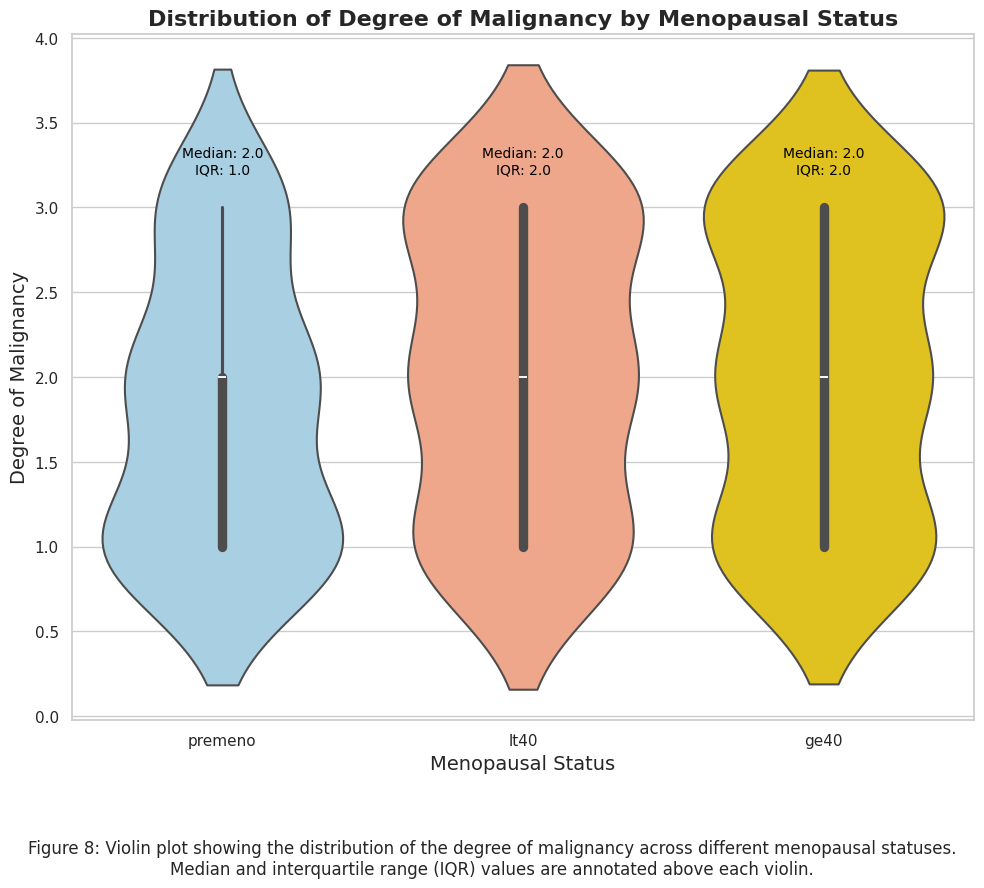

In [65]:
#menopause vs malignancy

# Re-import libraries after execution state reset
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define a dataset structure for testing purposes
# Assuming the 'df' structure contains 'menopause' and 'deg_maling'
df = pd.DataFrame({
    'menopause': np.random.choice(['premeno', 'lt40', 'ge40'], 100),
    'deg_maling': np.random.randint(1, 4, 100)  # Random degrees of malignancy (1, 2, 3)
})

# Define custom colors similar to other plots: light blue, red, and light yellow
custom_palette = ['#A0D2EB', '#FFA07A', '#FFD700']

# Create the figure and axes
plt.figure(figsize=(10, 8))

# Create a violin plot using Seaborn
violin_plot = sns.violinplot(
    data=df,
    x='menopause',
    y='deg_maling',  # Degree of malignancy
    order=['premeno', 'lt40', 'ge40'],  # Order with lt40 in the middle
    palette=custom_palette,  # Use the custom colors
    inner='box',  # Display a boxplot inside the violins
    linewidth=1.5  # Make the edges clearer
)

# Calculate and display IQR and Median values for each group
for category in ['premeno', 'lt40', 'ge40']:
    group_data = df[df['menopause'] == category]['deg_maling']
    median = group_data.median()
    q1 = group_data.quantile(0.25)
    q3 = group_data.quantile(0.75)
    iqr = q3 - q1
    plt.text(
        x=['premeno', 'lt40', 'ge40'].index(category),
        y=max(group_data) + 0.2,
        s=f"Median: {median:.1f}\nIQR: {iqr:.1f}",
        ha='center',
        fontsize=10,
        color='black'
    )

# Add title and labels with updated styling
plt.title('Distribution of Degree of Malignancy by Menopausal Status', fontsize=16, weight='bold')
plt.xlabel('Menopausal Status', fontsize=14)
plt.ylabel('Degree of Malignancy', fontsize=14)

# Add a caption below the plot
plt.figtext(
    0.5, -0.1,
    "Figure 8: Violin plot showing the distribution of the degree of malignancy across different menopausal statuses.\n"
    "Median and interquartile range (IQR) values are annotated above each violin.",
    wrap=True, horizontalalignment='center', fontsize=12
)

# Display the plot
plt.tight_layout()
plt.show()




The violin plot visualizes the distribution of the degree of malignancy (ranging from 1 to 3) across different menopausal statuses. Each violin represents the range, density, and central tendency of malignancy scores for each group, with an embedded boxplot showing the interquartile range and median. The plot demonstrates notable variations in malignancy levels among the different groups.

The lt40 group shows a slightly higher density of malignancy degree 1 cases compared to the other groups, suggesting that this population may exhibit less aggressive cancers more frequently. In contrast, the ge40 group has a balanced distribution between malignancy degrees 2 and 3, reflecting a broader range of malignancy severity. The premenopausal group shows a more concentrated distribution around malignancy degree 2, with fewer extreme values. These findings highlight potential differences in tumor aggressiveness and behavior across menopausal statuses, which could have implications for tailored treatment and monitoring strategies.

The median degree of malignancy is 2 across all menopausal groups, indicating that degree 2 malignancy is the most common. However, the interquartile range (IQR) differs, with premenopausal women showing less variability (IQR = 1), while the lt40 and ge40 groups have greater variability (IQR = 2). This suggests that malignancy severity is more consistent in premenopausal women, while lt40 and ge40 groups exhibit a broader range of tumor aggressiveness.

**Conclusion**

This analysis highlights key patterns in breast cancer characteristics across various factors, including recurrence status, age, tumor size, menopausal status, and degree of malignancy. The findings reveal that higher degrees of malignancy and larger tumor sizes are associated with a greater likelihood of recurrence. Age distribution shows that most cases occur in the 40-59 age group, while menopausal status influences malignancy variability, with premenopausal women displaying less variability compared to lt40 and ge40 groups.

Overall, these results emphasize the importance of tailoring breast cancer management strategies to individual patient characteristics, such as age, menopausal status, and tumor aggressiveness. Identifying these patterns can guide more effective monitoring, treatment, and follow-up plans, ultimately improving patient outcomes.